In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

In [2]:
data = pd.read_csv(r"E:\Data Engineering - ITI\Python Libraries\Final Project\globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')
data

C:\Users\hp\AppData\Local\Temp\ipykernel_32528\81435454.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"E:\Data Engineering - ITI\Python Libraries\Final Project\globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [5]:
data.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(181691, 135)

In [11]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [13]:
important_col=data[[ 'iyear', 'imonth', 'iday','region_txt','provstate','city','country_txt',
                     'success','attacktype1_txt','targtype1_txt','corp1','target1','gname','doubtterr',
                      'longitude','latitude','natlty1_txt','weapdetail','nkill'
                      ,'nwound','propextent','dbsource'
                     ]]


In [15]:
data=important_col.rename(columns={ 'iyear':'Year','imonth':'Month','iday':'Day',	'region_txt':'region','provstate':'incident_place','country_txt':'country',	'success':'successful_operation','attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Description','corp1':'Target_Name'	,'target1':'Victim'	,'gname':'Perpetrator_Name','doubtterr':'Act_of_Terrorism or not '	
                                     ,'natlty1_txt':'Target_Nationality','weapdetail':'Weapon_Type','nkill':'Killed',
                                     'nwound':'Wounded_People','dbsource':'DB_Sourse'}
                               ) 
data

,Year,Month,Day,region,incident_place,city,country,successful_operation,Attack_Type,Target_Description,Target_Name,Victim,Perpetrator_Name,Act_of_Terrorism or not,longitude,latitude,Target_Nationality,Weapon_Type,Killed,Wounded_People,propextent,DB_Sourse
0,1970,7,2,Central America & Caribbean,NaN,Santo Domingo,Dominican Republic,1,Assassination,Private Citizens & Property,NaN,Julio Guzman,MANO-D,0.0,-69.951164,18.456792,Dominican Republic,NaN,1.0,0.0,NaN,PGIS
1,1970,0,0,North America,Federal,Mexico city,Mexico,1,Hostage Taking (Kidnapping),Government (Diplomatic),Belgian Ambassador Daughter,"Nadine Chaval, daughter",23rd of September Communist League,0.0,-99.086624,19.371887,Belgium,NaN,0.0,0.0,NaN,PGIS
2,1970,1,0,Southeast Asia,Tarlac,Unknown,Philippines,1,Assassination,Journalists & Media,Voice of America,Employee,Unknown,0.0,120.599741,15.478598,United States,NaN,1.0,0.0,NaN,PGIS
3,1970,1,0,Western Europe,Attica,Athens,Greece,1,Bombing/Explosion,Government (Diplomatic),NaN,U.S. Embassy,Unknown,0.0,23.762728,37.997490,United States,Explosive,NaN,NaN,NaN,PGIS
4,1970,1,0,East Asia,Fukouka,Fukouka,Japan,1,Facility/Infrastructure Attack,Government (Diplomatic),NaN,U.S. Consulate,Unknown,-9.0,130.396361,33.580412,United States,Incendiary,NaN,NaN,NaN,PGIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,Somalia,1,Armed Assault,Military,Somali National Army (SNA),Checkpoint,Al-Shabaab,1.0,45.385034,2.359673,Somalia,NaN,1.0,2.0,NaN,START Primary Collection
181687,2017,12,31,Middle East & North Africa,Lattakia,Jableh,Syria,1,Bombing/Explosion,Military,Russian Air Force,Hmeymim Air Base,Muslim extremists,1.0,35.942679,35.407278,Russia,Mortars were used in the attack.,2.0,7.0,4.0,START Primary Collection
181688,2017,12,31,Southeast Asia,Maguindanao,Kubentog,Philippines,1,Facility/Infrastructure Attack,Private Citizens & Property,Not Applicable,Houses,Bangsamoro Islamic Freedom Movement (BIFM),0.0,124.437908,6.900742,Philippines,NaN,0.0,0.0,4.0,START Primary Collection
181689,2017,12,31,South Asia,Manipur,Imphal,India,0,Bombing/Explosion,Government (General),Forest Department Manipur,Office,Unknown,0.0,93.940430,24.798346,India,A thrown grenade was used in the attack.,0.0,0.0,NaN,START Primary Collection


In [17]:
columns=data.columns
for col in columns:
    print(f" {col} : {data[col].isnull().sum()}")

 Year : 0
 Month : 0
 Day : 0
 region : 0
 incident_place : 421
 city : 435
 country : 0
 successful_operation : 0
 Attack_Type : 0
 Target_Description : 0
 Target_Name : 42552
 Victim : 638
 Perpetrator_Name : 0
 Act_of_Terrorism or not  : 1
 longitude : 4557
 latitude : 4556
 Target_Nationality : 1559
 Weapon_Type : 67670
 Killed : 10313
 Wounded_People : 16311
 propextent : 117626
 DB_Sourse : 0


In [19]:
data.duplicated().sum()

9816

In [21]:
data.shape

(181691, 22)

In [23]:
#columns=data['ID','Year','Month','Day',	'region','incident_place','city','country','successful_operation','Attack_Type',
 #         'Target_Description','Target_Name','Victim','Perpetrator_Name','longitude','latitude',
  #        'Target_Nationality',	'Weapon_Type','weapdetail','Killed','Terrorist_Killed','Wounded_People','Terrorist_Wounded','Extra_Damage',
   #       'ishostkid','DB_Sourse']
#data.dropna(subset=columns,inplace=True)

In [25]:
columns=data.columns
for col in columns:
    print(f" {col} : {data[col].isnull().sum()}")

 Year : 0
 Month : 0
 Day : 0
 region : 0
 incident_place : 421
 city : 435
 country : 0
 successful_operation : 0
 Attack_Type : 0
 Target_Description : 0
 Target_Name : 42552
 Victim : 638
 Perpetrator_Name : 0
 Act_of_Terrorism or not  : 1
 longitude : 4557
 latitude : 4556
 Target_Nationality : 1559
 Weapon_Type : 67670
 Killed : 10313
 Wounded_People : 16311
 propextent : 117626
 DB_Sourse : 0


In [27]:
for col in data.select_dtypes('object'):
    print(col)
    print(data[col].unique())
    print("----------------------------")



region
['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']
----------------------------
incident_place
[nan 'Federal' 'Tarlac' ... 'Carlow' 'Western Lakes' 'Vidzeme']
----------------------------
city
['Santo Domingo' 'Mexico city' 'Unknown' ... 'Hungrum' 'Ceelka Geelow'
 'Kubentog']
----------------------------
country
['Dominican Republic' 'Mexico' 'Philippines' 'Greece' 'Japan'
 'United States' 'Uruguay' 'Italy' 'East Germany (GDR)' 'Ethiopia'
 'Guatemala' 'Venezuela' 'West Germany (FRG)' 'Switzerland' 'Jordan'
 'Spain' 'Brazil' 'Egypt' 'Argentina' 'Lebanon' 'Ireland' 'Turkey'
 'Paraguay' 'Iran' 'United Kingdom' 'Colombia' 'Bolivia' 'Nicaragua'
 'Netherlands' 'Belgium' 'Canada' 'Australia' 'Pakistan' 'Zambia' 'Sweden'
 'Costa Rica' 'South Yemen' 'Cambodia' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'Kuwait' 'Wes

In [29]:
most_frequent_values =  data.select_dtypes('object').mode().iloc[0]
print("Most Frequent Values:")
print(most_frequent_values)

Most Frequent Values:
region                 Middle East & North Africa
incident_place                            Baghdad
city                                      Unknown
country                                      Iraq
Attack_Type                     Bombing/Explosion
Target_Description    Private Citizens & Property
Target_Name                               Unknown
Victim                                  Civilians
Perpetrator_Name                          Unknown
Target_Nationality                           Iraq
Weapon_Type                             Explosive
DB_Sourse                START Primary Collection
Name: 0, dtype: object


In [31]:
mean_values = data.select_dtypes('int').mean()
print("Mean Values:")
print(mean_values)

Mean Values:
Year                    2002.638997
Month                      6.467277
Day                       15.505644
successful_operation       0.889598
dtype: float64


In [33]:
mean_values = data.select_dtypes('float').mean()
print("Mean Values:")
print(mean_values)

Mean Values:
Act_of_Terrorism or not      -0.523171
longitude                  -458.695653
latitude                     23.498343
Killed                        2.403272
Wounded_People                3.167668
propextent                    3.295403
dtype: float64


In [35]:
for col in data.select_dtypes('int'):
    print(col)
    print(data[col].unique())
    print("----------------------------")

Year
[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
----------------------------
Month
[ 7  0  1  2  3  4  5  6  8  9 10 11 12]
----------------------------
Day
[ 2  0  1  3  6  8  9 10 11 12 13 14 15 19 20 21 22 25 26 27 28 30 31  4
  7 16 17 18 23 24  5 29]
----------------------------
successful_operation
[1 0]
----------------------------


In [37]:
print(data['Attack_Type'].isnull().sum())

0


In [39]:
print(data['Attack_Type'].unique())

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


In [41]:
data['Attack_Type'].fillna('UnKnown')

0                          Assassination
1            Hostage Taking (Kidnapping)
2                          Assassination
3                      Bombing/Explosion
4         Facility/Infrastructure Attack
                       ...              
181686                     Armed Assault
181687                 Bombing/Explosion
181688    Facility/Infrastructure Attack
181689                 Bombing/Explosion
181690                 Bombing/Explosion
Name: Attack_Type, Length: 181691, dtype: object

In [43]:
data['Attack_Type']=data['Attack_Type'].str.lower()

In [45]:
print(data['Attack_Type'].unique())

['assassination' 'hostage taking (kidnapping)' 'bombing/explosion'
 'facility/infrastructure attack' 'armed assault' 'hijacking' 'unknown'
 'unarmed assault' 'hostage taking (barricade incident)']


In [47]:
data['country']=data['country'].str.strip()

In [49]:
data['country'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [51]:
data['region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [53]:
data['Attack_Type'].unique()

array(['assassination', 'hostage taking (kidnapping)',
       'bombing/explosion', 'facility/infrastructure attack',
       'armed assault', 'hijacking', 'unknown', 'unarmed assault',
       'hostage taking (barricade incident)'], dtype=object)

In [55]:
data['Target_Description'].unique()

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

In [57]:
data['Weapon_Type'].unique()

array([nan, 'Explosive', 'Incendiary', ...,
       'More than 10 mortars were used in the attack.',
       'A 9-mm carbine rifle was used in the attack.',
       'An explosive device containing a detonating cord, a battery, and a blasting cap was used in the attack.'],
      dtype=object)

In [59]:
#data['Killed']=data['Killed'].fillna

In [61]:
#newdata=data.copy()
#newdata['Killed'] = newdata['Killed'].astype(int)

In [63]:
data.duplicated().sum()

9816

In [65]:
data.shape

(181691, 22)

In [67]:
data.describe()


,Year,Month,Day,successful_operation,Act_of_Terrorism or not,longitude,latitude,Killed,Wounded_People,propextent
count,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,1.771340e+05,177135.000000,171378.000000,165380.000000,64065.000000
mean,2002.638997,6.467277,15.505644,0.889598,-0.523171,-4.586957e+02,23.498343,2.403272,3.167668,3.295403
std,13.259430,3.388303,8.814045,0.313391,2.455819,2.047790e+05,18.569242,11.545741,35.949392,0.486912
min,1970.000000,0.000000,0.000000,0.000000,-9.000000,-8.618590e+07,-53.154613,0.000000,0.000000,1.000000
25%,1991.000000,4.000000,8.000000,1.000000,0.000000,4.545640e+00,11.510046,0.000000,0.000000,3.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000,4.324651e+01,31.467463,0.000000,0.000000,3.000000
75%,2014.000000,9.000000,23.000000,1.000000,0.000000,6.871033e+01,34.685087,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.793667e+02,74.633553,1570.000000,8191.000000,4.000000


In [69]:
data.dtypes

Year                          int64
Month                         int64
Day                           int64
region                       object
incident_place               object
city                         object
country                      object
successful_operation          int64
Attack_Type                  object
Target_Description           object
Target_Name                  object
Victim                       object
Perpetrator_Name             object
Act_of_Terrorism or not     float64
longitude                   float64
latitude                    float64
Target_Nationality           object
Weapon_Type                  object
Killed                      float64
Wounded_People              float64
propextent                  float64
DB_Sourse                    object
dtype: object

In [71]:
numericcol=['longitude','latitude','Killed','Wounded_People']

In [73]:
meanvalues = data[numericcol].mean()
print("Mean Values:")
print(meanvalues)

Mean Values:
longitude        -458.695653
latitude           23.498343
Killed              2.403272
Wounded_People      3.167668
dtype: float64


In [75]:
medianvalues = data[numericcol].median()
print("Median Values:")
print(medianvalues)

Median Values:
longitude         43.246506
latitude          31.467463
Killed             0.000000
Wounded_People     0.000000
dtype: float64


In [77]:
stdvalues =  data[numericcol].std()
print("Standard Deviation values:")
print(stdvalues)

Standard Deviation values:
longitude         204778.988611
latitude              18.569242
Killed                11.545741
Wounded_People        35.949392
dtype: float64


In [113]:
grouped_data=data.groupby(['country','Year']).size().reset_index(name='attack_count')

In [115]:
maxyear=grouped_data.loc[grouped_data.groupby('country')['attack_count'].idxmax()]
maxyear

,country,Year,attack_count
29,Afghanistan,2015,1928
38,Albania,1997,41
60,Algeria,1997,344
81,Andorra,1974,1
94,Angola,1990,205
...,...,...,...
3681,Yemen,2014,763
3700,Yugoslavia,1998,46
3714,Zaire,1996,13
3727,Zambia,1989,18


In [79]:
grouped_data = data.groupby('Year')['Killed'].sum().reset_index()
year_with_highest_killed = grouped_data.loc[grouped_data['Killed'].idxmax()]
print("Year with highest number of killed:")
print(year_with_highest_killed)


Year with highest number of killed:
Year       2014.0
Killed    44490.0
Name: 43, dtype: float64


In [119]:
year_with_lowest_killed = grouped_data.loc[grouped_data['Killed'].idxmin()]
print("\nYear with lowest number of killed:")
print(year_with_lowest_killed)


Year with lowest number of killed:
Year      1971.0
Killed     173.0
Name: 1, dtype: float64


In [151]:
attackcountbyregion=data.groupby(['region']).size().reset_index(name='attack_count')
attackcountbyregion

,region,attack_count
0,Australasia & Oceania,282
1,Central America & Caribbean,10344
2,Central Asia,563
3,East Asia,802
4,Eastern Europe,5144
5,Middle East & North Africa,50474
6,North America,3456
7,South America,18978
8,South Asia,44974
9,Southeast Asia,12485


In [83]:
Highest_Targetnationality = data['Target_Nationality'].value_counts().reset_index()
Highest_Targetnationality

,Target_Nationality,count
0,Iraq,24113
1,Pakistan,13900
2,India,12098
3,Afghanistan,10931
4,Colombia,7922
...,...,...
210,People's Republic of the Congo,1
211,Saba (Netherlands Antilles),1
212,Tuvalu,1
213,Western Sahara,1


Killed Number Through Years

In [86]:
grouped_data=data.groupby(['Year']).size().reset_index(name='Killed')

In [88]:
Year_with_high_victims=grouped_data.loc[grouped_data.groupby('Year')['Killed'].idxmax()]

In [90]:
KilledNumbers = Year_with_high_victims.sort_values(by='Killed', ascending=False)
KilledNumbers

,Year,Killed
43,2014,16903
44,2015,14965
45,2016,13587
42,2013,12036
46,2017,10900
41,2012,8522
40,2011,5076
22,1992,5071
39,2010,4826
37,2008,4805


In [92]:
number_of_attack_according_to_weapontype = data.groupby('Weapon_Type').size().reset_index(name='Killed').sort_values(by='Killed',ascending=False)
number_of_attack_according_to_weapontype

,Weapon_Type,Killed
9851,Explosive,20925
8785,Automatic firearm,12419
13431,Pistol,4472
11736,Incendiary,4153
10347,Firearm,4053
...,...,...
6828,An explosive device weighing 15 kilograms and ...,1
6829,An explosive device weighing 15 kilograms hidd...,1
6830,An explosive device weighing 15 kilograms plac...,1
6831,An explosive device weighing 15 kilograms that...,1


In [94]:
number_of_attack_according_to_attacktype = data.groupby('Attack_Type').size().reset_index(name='Killed').sort_values(by='Killed',ascending=False)
number_of_attack_according_to_attacktype

,Attack_Type,Killed
2,bombing/explosion,88255
0,armed assault,42669
1,assassination,19312
6,hostage taking (kidnapping),11158
3,facility/infrastructure attack,10356
8,unknown,7276
7,unarmed assault,1015
5,hostage taking (barricade incident),991
4,hijacking,659


Number of operations failed and sucssed


In [111]:
successful_and_faild_operations = data.groupby('successful_operation')['incident_place'].count().reset_index(name='operations')
successful_and_faild_operations

,successful_operation,operations
0,0,20025
1,1,161245


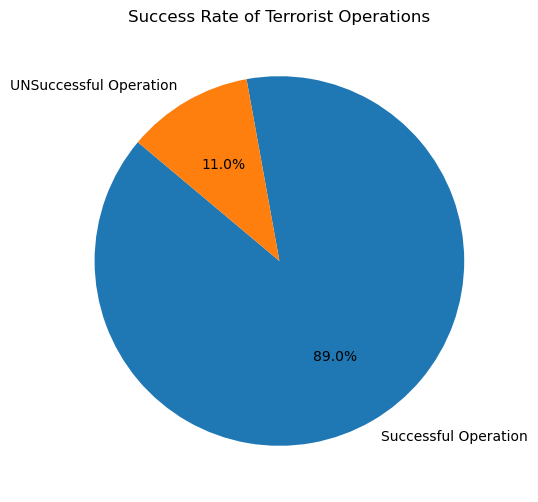

In [147]:
success_count = data['successful_operation'].value_counts()
labels = ['Successful Operation','UNSuccessful Operation']
plt.figure(figsize=(8,6))
plt.pie(success_count,labels=labels,autopct='%1.1f%%',startangle=140)
plt.title('Success Rate of Terrorist Operations')
plt.show()

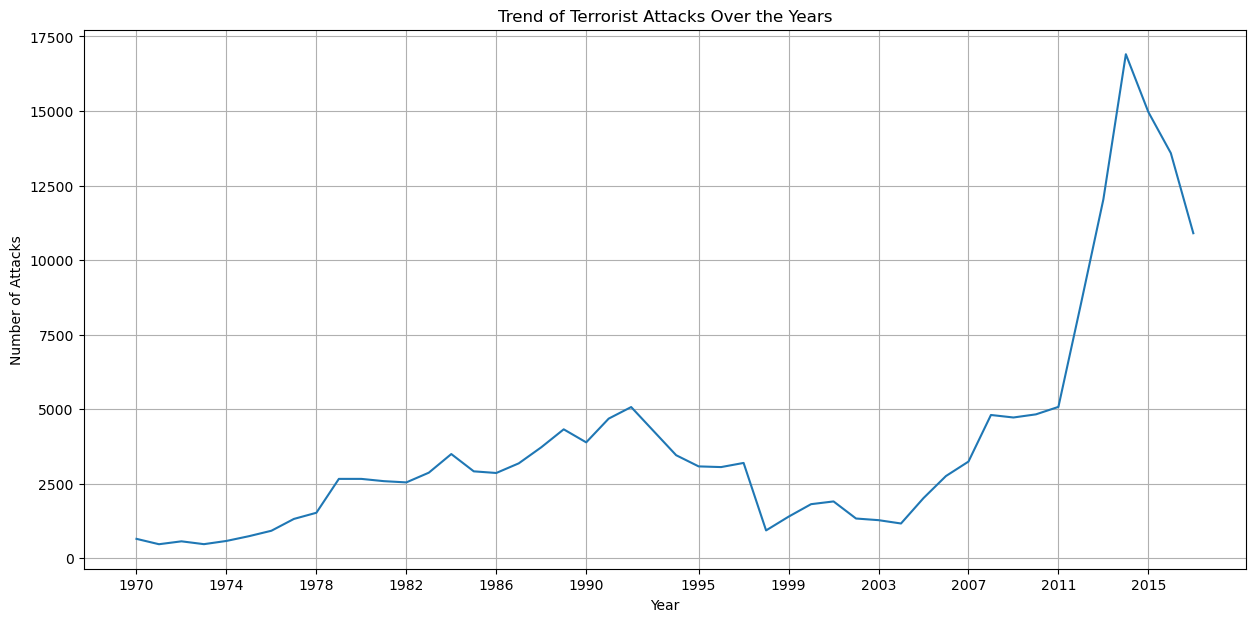

In [96]:
attacks_per_year = data.groupby('Year').size()

plt.figure(figsize=(15, 7))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values)
plt.title('Trend of Terrorist Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.xticks(list(attacks_per_year.index[::4]))
plt.show()

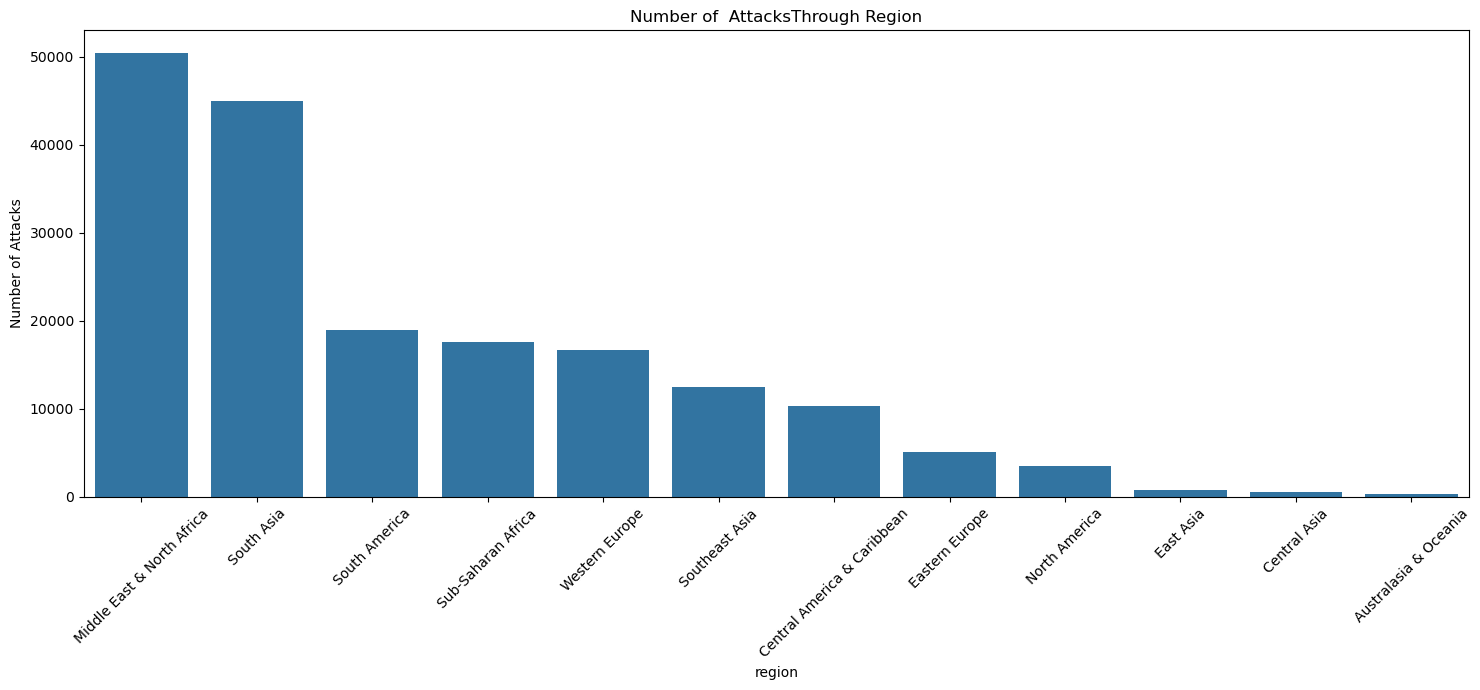

In [97]:
attacks_by_region = data['region'].value_counts()

plt.figure(figsize=(15, 7))
sns.barplot(x=attacks_by_region.index, y=attacks_by_region.values)
plt.title('Number of  AttacksThrough Region')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

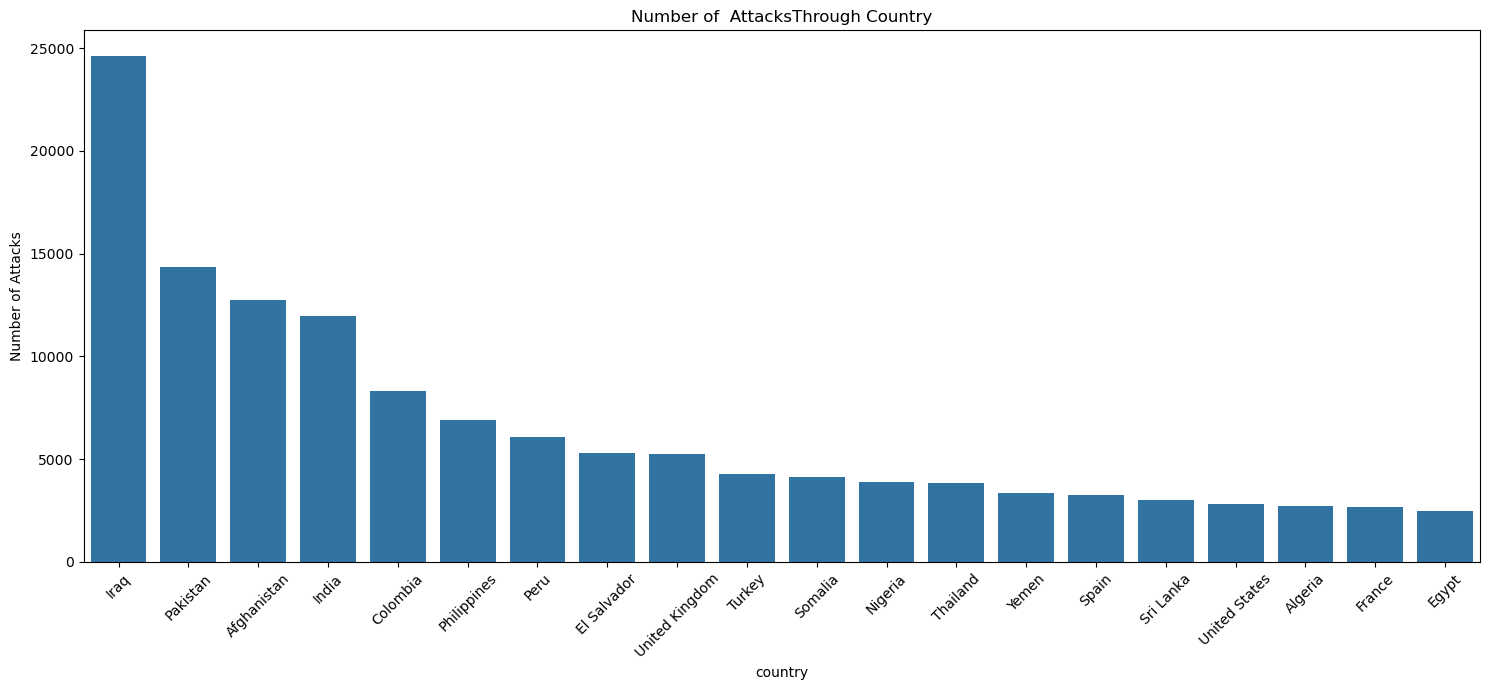

In [98]:
attacks_by_country = data['country'].value_counts().head(20)

plt.figure(figsize=(15, 7))
sns.barplot(x=attacks_by_country.index, y=attacks_by_country.values)
plt.title('Number of  AttacksThrough Country')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




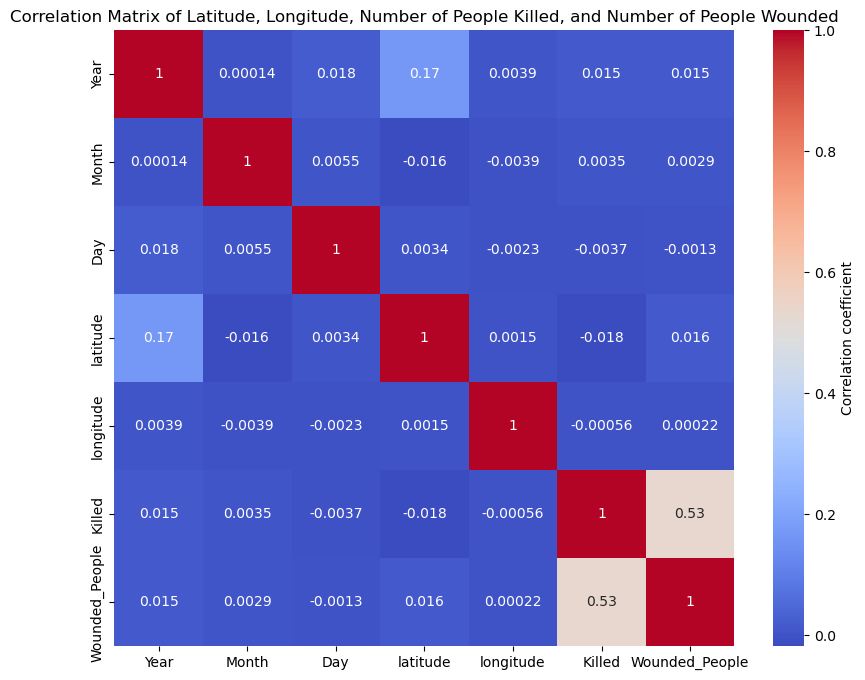

In [99]:
relevant_data = data[['Year','Month','Day','latitude', 'longitude', 'Killed', 'Wounded_People']]
correlation_matrix = relevant_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix of Latitude, Longitude, Number of People Killed, and Number of People Wounded')
plt.show()

In [137]:
regionandnumberofkilledvis = data.groupby('region')['Killed'].count().reset_index(name='count')
regionandnumberofkilledvis['KillsNumbers'] = data.groupby('region')['Killed'].sum().reset_index(name='count')['count']
print(regionandnumberofkilledvis)

                         region  count  KillsNumbers
0         Australasia & Oceania    276         150.0
1   Central America & Caribbean   8022       28708.0
2                  Central Asia    559        1000.0
3                     East Asia    763        1152.0
4                Eastern Europe   4978        7415.0
5    Middle East & North Africa  48201      137642.0
6                 North America   3363        4916.0
7                 South America  17306       28849.0
8                    South Asia  44037      101319.0
9                Southeast Asia  12209       15637.0
10           Sub-Saharan Africa  15937       78386.0
11               Western Europe  15727        6694.0


Text(0.5, 1.0, 'Number of attacks vs number of kills on Eachregion')

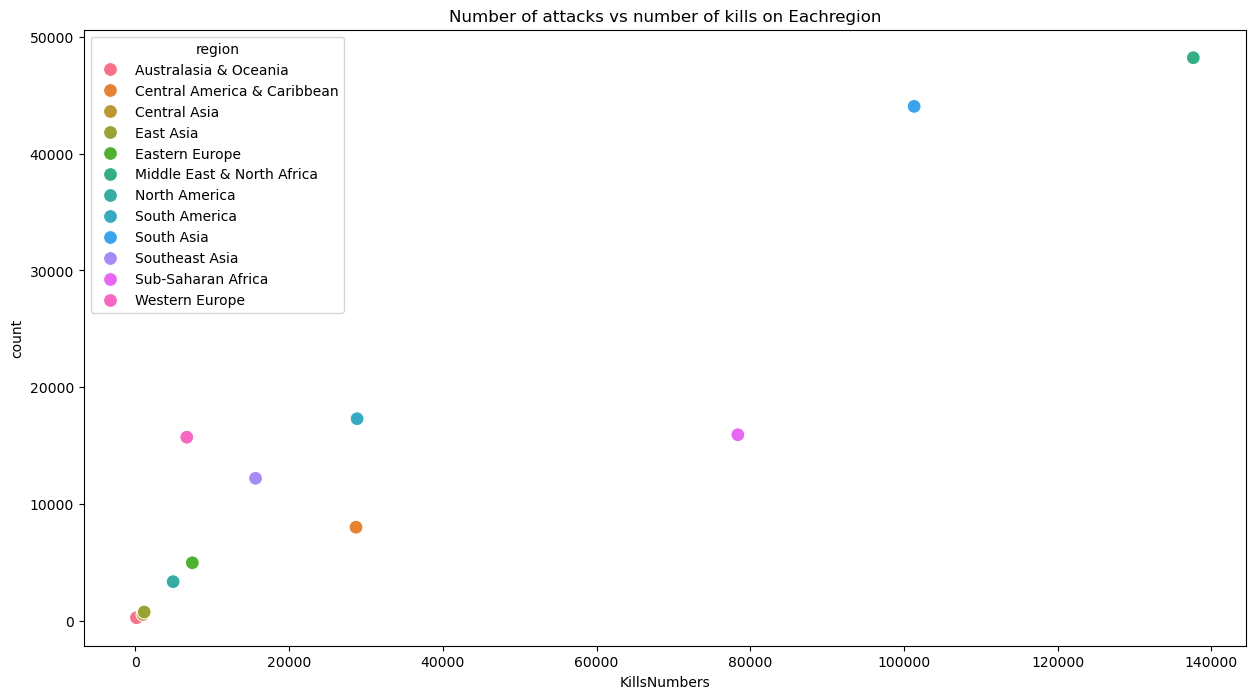

In [139]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = regionandnumberofkilledvis , x='KillsNumbers', y='count', hue='region', s=100)
plt.title('Number of attacks vs number of kills on Eachregion')

In [129]:
groupeddata = data.groupby('Attack_Type')['Killed'].count().reset_index(name='count')
groupeddata['KillsNumbers'] = data.groupby('Attack_Type')['Killed'].sum().reset_index(name='count')['count']
print(groupeddata)

                           Attack_Type  count  KillsNumbers
0                        armed assault  40353      160297.0
1                        assassination  19233       24920.0
2                    bombing/explosion  84322      157321.0
3       facility/infrastructure attack   9788        3642.0
4                            hijacking    606        3718.0
5  hostage taking (barricade incident)    898        4478.0
6          hostage taking (kidnapping)   8610       24231.0
7                      unarmed assault   1001         880.0
8                              unknown   6567       32381.0


Text(0.5, 1.0, 'Number of attacks and number of kills by attack type')

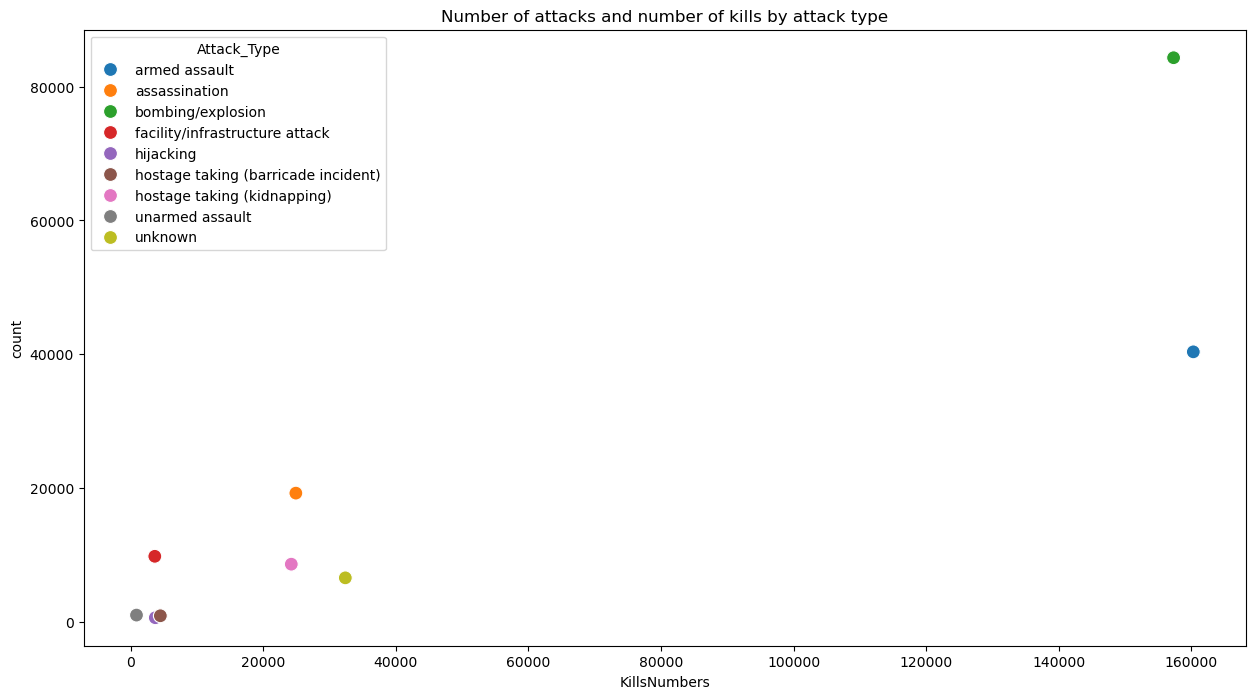

In [149]:
plt.figure(figsize=(15,8))
sns.scatterplot(data = groupeddata , x='KillsNumbers', y='count', hue='Attack_Type', s=100)
plt.title('Number of attacks and number of kills by attack type')